In [41]:
import sys
import os
sys.path.insert(0, '..')
import plots
import pandas as pd
import matplotlib.pyplot as plt

analyzer = plots.DataAnalyser()

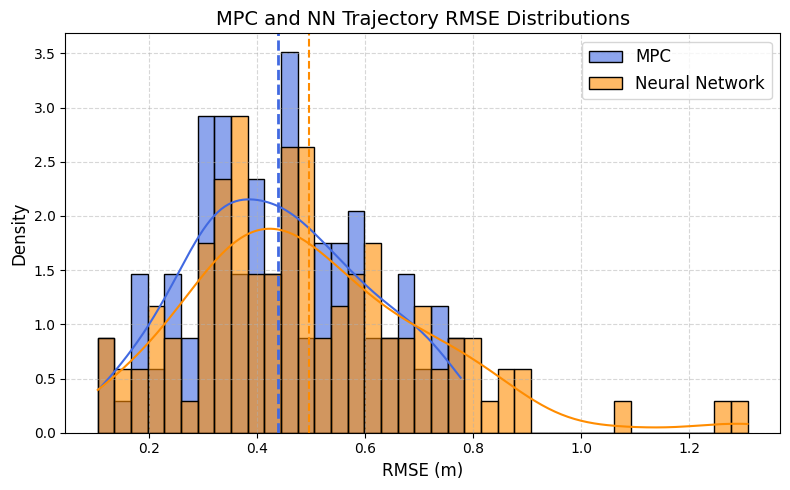

In [ ]:
path = '../../training_results/reasonable_trajectories_v1/dataset_metadata.csv'
df_reasonable = pd.read_csv(path, sep=',')

# Filters - reasonable trajectories
df_reasonable = df_reasonable[(df_reasonable['mpc_success'] == True) & (df_reasonable['mpc_RMSe'] <= 0.8 ) & (df_reasonable['nn_success'] == True)]

analyzer.plot_histogram(df_reasonable, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'])
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', '$t_{execution}/t_{simulation}$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='simulation_time (s)')


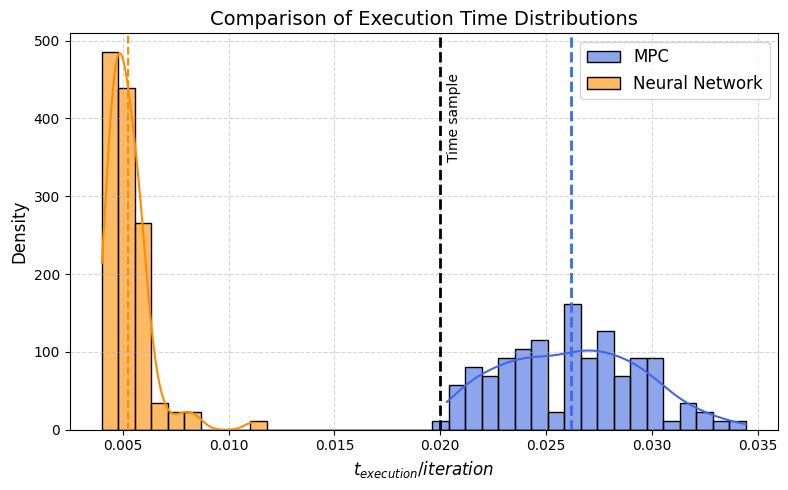

In [43]:
analyzer.plot_histogram(df_reasonable, 'mpc_execution_time (s)', 'nn_execution_time (s)', '$t_{execution}/iteration$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='num_iterations')
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', 'CPU Use Percentage', 'Comparison of CPU Use Percentage', ['MPC', 'Neural Network'], normalization_column=['time_sample (s)', 'num_iterations'])



In [44]:
stats_rmse = analyzer.stats_simulations(df_reasonable, 'mpc_RMSe', 'nn_RMSe')
stats_rmse



,Controller,min,max,mean,std
0,MPC,0.109531,0.776953,0.439755,0.163999
1,Neural Network,0.105996,1.307337,0.496944,0.223187


In [45]:
stats_execution_time = analyzer.stats_simulations(df_reasonable, 'mpc_execution_time_per_iteration', 'nn_execution_time_per_iteration')
stats_execution_time


,Controller,min,max,mean,std
0,MPC,0.020313,0.034436,0.026166,0.003240
1,Neural Network,0.004012,0.011135,0.005240,0.001011


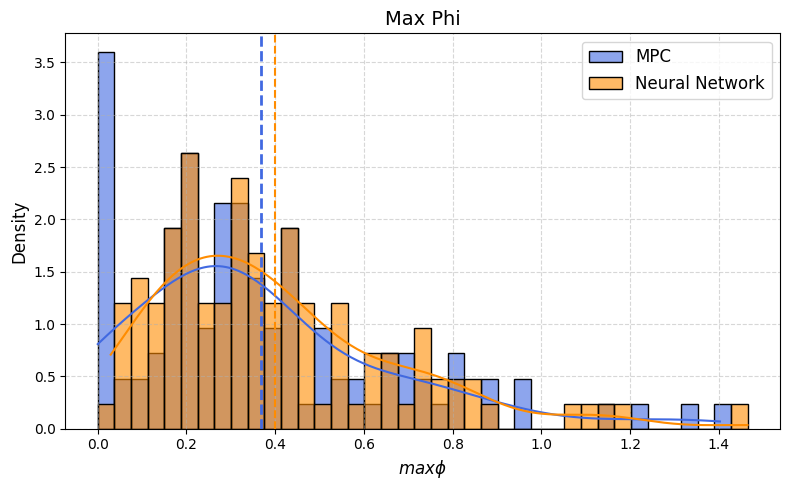

In [46]:
analyzer.plot_histogram(df_reasonable, 'mpc_max_phi (rad)', 'nn_max_phi', '$max \\phi$', 'Max Phi', ['MPC', 'Neural Network'])

In [47]:
stats_max_phi = analyzer.stats_simulations(df_reasonable, 'mpc_max_phi (rad)', 'nn_max_phi')
stats_max_phi

,Controller,min,max,mean,std
0,MPC,1.531748e-08,1.402514,0.367063,0.298696
1,Neural Network,2.923700e-02,1.464668,0.400519,0.274485


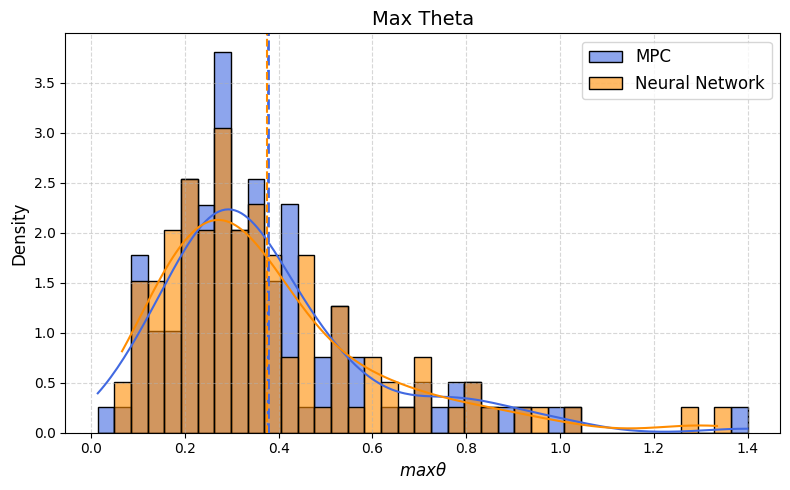

In [48]:
analyzer.plot_histogram(df_reasonable, 'mpc_max_theta (rad)', 'nn_max_theta', '$max \\theta$', 'Max Theta', ['MPC', 'Neural Network'])

In [49]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_RMSe']
# y2 = df_performance['mpc_RMSe']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('RMSe (m)')
# plt.title('RMSe vs Period')
# plt.legend(['Neural Network', 'MPC'])

In [50]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_phi']
# y2 = df_performance['mpc_max_phi (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\phi$ (rad)')
# plt.title('Max Phi vs Period')
# plt.legend(['Neural Network', 'MPC'])

In [51]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_theta']
# y2 = df_performance['mpc_max_theta (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\theta$ (rad)')
# plt.title('Max Theta vs Period')
# plt.legend(['Neural Network', 'MPC'])

x75
 0.2184232732178391


c:\Users\MLIRA\OneDrive - Embraer\Documents\PEE31\ITA\Fase IV\Codes\msc_ita_models\6dof_quadrotor\figures-tables\..\plots.py:408: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


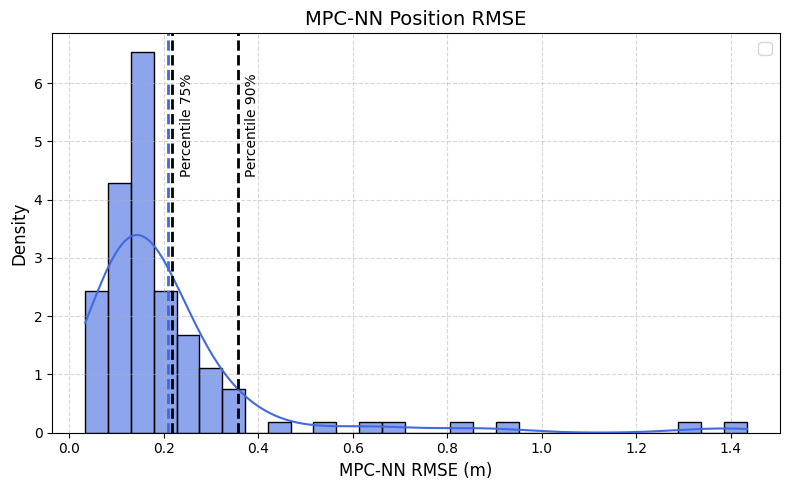

In [52]:
# MPC-NN Position RMSE
analyzer.plot_histogram_temp(df_reasonable, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE')

C:\Users\MLIRA\AppData\Local\Temp\ipykernel_6876\2297671443.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


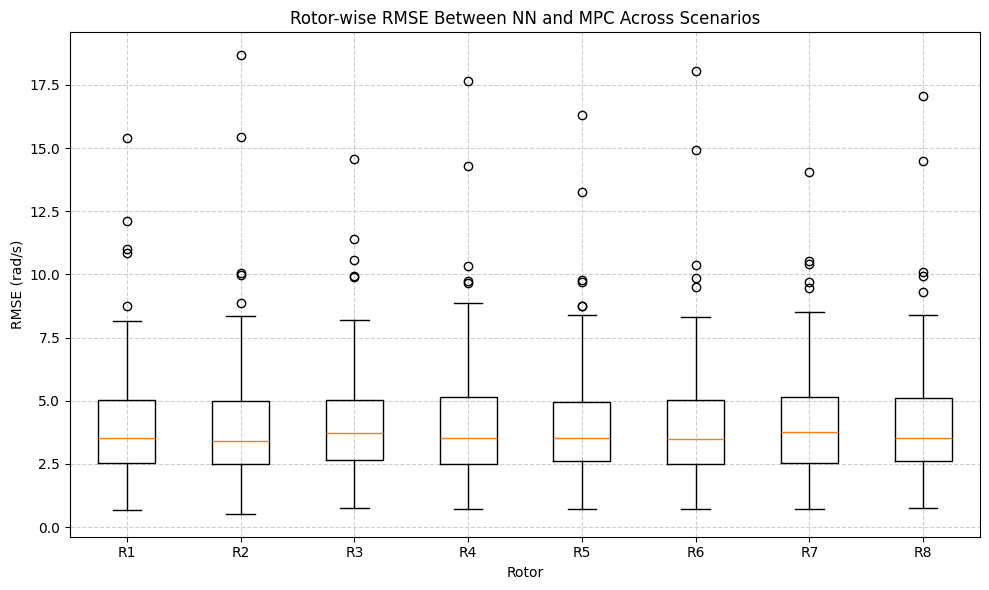

In [53]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()